##### 特征降维是无监督学习中的另一个应用，目的有两个：
#####    1.我们经常在实际项目中遇到特征维度非常高的样本，而无法借助自己的领域知识建立有效的特征
#####    2.超过3个特诊的样本，人眼就无法观察，也无法进行有效的可视化。
#####  数据降维的好处：
#####    1.重构低维度的特征向量
#####    2.为数据的展现提供可能
##### 主成份分析PCA Principal Component Analysis是最为经典和实用的特征降维技术，特别在辅助图像识别方面表现突出

##### PCA首先把原来的特征空间做一个映射，使得映射后的特征空间彼此正交，这样一来我们就能保留下主要的低维的数据特征

### 1.编程实战，使用PCA压缩手写字体数据到2维空间，映射到二维空间的分布情况

In [20]:
import pandas as pd
import numpy as np
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)

In [21]:
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)

### 2.分割特征向量和标记

In [23]:
X = digits_train[np.arange(64)]
Y = digits_train[64]
X_test = digits_test[np.arange(64)]
Y_test = digits_test[64]

### 3.使用PCA降维

In [25]:
from sklearn.decomposition import PCA
#初始化一个可以把高维向量压缩为2维的PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [26]:
X_pca.shape

(3823, 2)

### 4.显示压缩后的二维空间

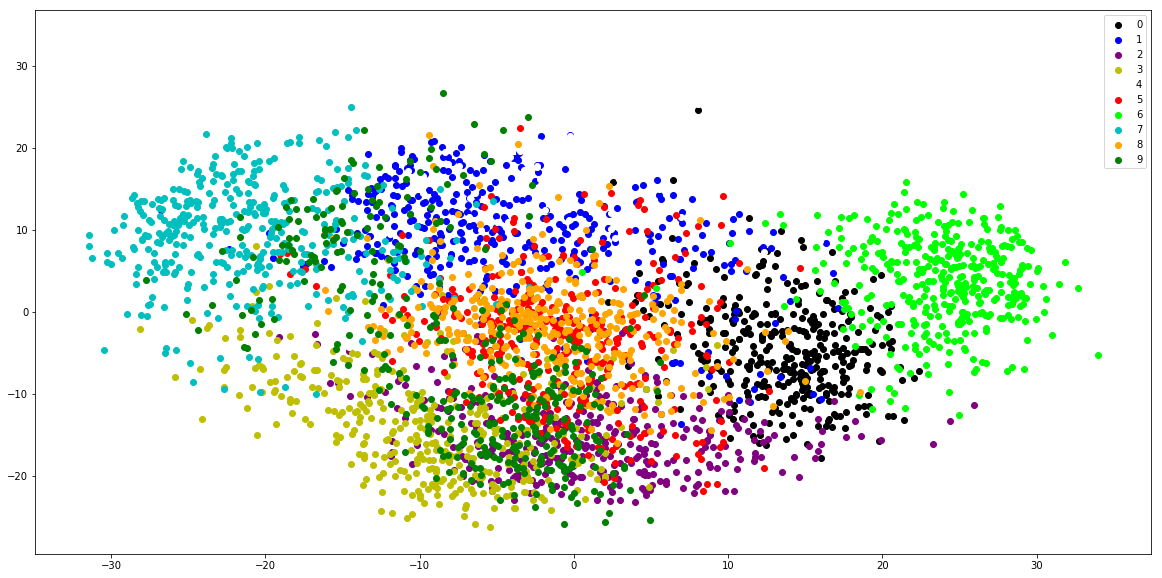

In [28]:
import matplotlib.pyplot as plt
#定义10种颜色，用于显示0到9的数字
colors = ['k','b','purple','y','w','r','lime','c','orange','g']
plt.figure(figsize=(20,10))
for i in np.arange(len(colors)):
    px = X_pca[:,0][Y.as_matrix() == i]
    py = X_pca[:,1][Y.as_matrix() == i]
    plt.scatter(px,py,c=colors[i])

plt.legend(np.arange(0,10).astype(str))
plt.show()

In [31]:
Y.as_matrix()


array([0, 0, 7, ..., 6, 6, 7], dtype=int64)

### 5.使用压缩过后的特征进行分类

###### 为了对比，这里采用一个SVC用原始的64维特征，另一个采用经过PCA压缩过的二维特征来分类

In [33]:
from sklearn.svm import SVC
svc64 = SVC(kernel='linear')
svc64.fit(X,Y)
svc64_predict = svc64.predict(X_test)

In [35]:
#初始化30维的pca
pca = PCA(n_components=30)
#将测试数据64位向量转换为30维
X_pca_30 = pca.fit_transform(X)
svc30 = SVC(kernel='linear')
#使用30维的数据训练模型
svc30.fit(X_pca_30,Y)
#测试数据用transform方法转换为30维
X_pca_test_30 = pca.transform(X_test)
#predict方法预测
svc30_predict = svc30.predict(X_pca_test_30)

### 6.性能评测

In [37]:

print('64维数据预测 Accuracy : %s '%(svc64.score(X_test,Y_test)))
print('30维数据预测 Accuracy : %s '%(svc30.score(X_pca_test_30,Y_test)))

64维数据预测 Accuracy : 0.961046188091 
30维数据预测 Accuracy : 0.957707289928 


In [38]:
#使用线性评测指
from sklearn.metrics import classification_report
print("64维数据预测：\n",classification_report(svc64_predict,Y_test,target_names=np.arange(10).astype(str)))

64维数据预测：
              precision    recall  f1-score   support

          0       0.99      0.99      0.99       179
          1       0.98      0.92      0.95       194
          2       0.96      0.96      0.96       177
          3       0.93      0.95      0.94       180
          4       0.99      0.98      0.99       183
          5       0.99      0.92      0.95       195
          6       0.99      0.98      0.99       182
          7       0.92      0.99      0.95       167
          8       0.90      0.97      0.93       162
          9       0.94      0.96      0.95       178

avg / total       0.96      0.96      0.96      1797



In [39]:
print("30维数据预测：\n",classification_report(svc30_predict,Y_test,target_names=np.arange(10).astype(str)))

30维数据预测：
              precision    recall  f1-score   support

          0       1.00      0.99      0.99       180
          1       0.99      0.90      0.94       201
          2       0.96      0.98      0.97       174
          3       0.96      0.95      0.95       185
          4       0.98      0.98      0.98       182
          5       0.97      0.93      0.95       190
          6       0.98      0.99      0.98       179
          7       0.92      0.98      0.95       169
          8       0.89      0.97      0.93       159
          9       0.93      0.94      0.93       178

avg / total       0.96      0.96      0.96      1797



### 7.特点分析

##### 从结果看，使用经过PCA压缩过的数据来预测与直接使用64维数据来做预测，结果相差了1%,但是维度却减少了56.7%。
##### 因此维度压缩后能够节省大量用于模型训练的时间